### In this notebook we will compile interesting questions that we can answer using the data from this table.
### We can refer to data_exploration.ipynb to figure out what kind of information we already have.

1. On an average, how often do people order from Instacart?
2. What product was ordered most often?
3. At what time during the day do people order most? Can we have a plot for how busy different times during the day are?
4. How often do people order ice-cream? How often do they order alcohol?
5. If we classify all food-related orders under food groups (dairy, vegetables, protein) - what groups are represented more than others in terms of number of items?
6. What kind of alcohol is most popular? lol
7. What aisles are the most popular? Can we draw any conclusions about eating habits based on this?
8. What is usually the first item people put into their cart?

### Q1. On an average, how often do people order from Instacart?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
orders = pd.read_csv('./instacart-market-basket-analysis/orders.csv')

In [3]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [4]:
# plan: take the average of the row days_since_prior_order, but don't include NaNs.
# pandas ignores NaNs while taking average, so we only need to call the average method on the series.

print('On an average, people order once every ', orders['days_since_prior_order'].mean(), 'days')

On an average, people order once every  11.114836226863012 days


### Q2. What product was ordered most often?

In [5]:
# plan - we use two tables: order_products__train.csv and order_products__prior.csv. We assume these have different values, and we check if they are the same. Best to check the kaggle dataset for any hints as to what these files have.

# for simplicity, we take just one file for this question - prior.

order_products_prior = pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')

In [6]:
# the table looks like so:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [7]:
products = pd.read_csv('./instacart-market-basket-analysis/products.csv')

In [8]:
# for each order, we want each product to be considered only once in our calculations. So we should remove duplicates of the same order_id and product_id for this question.

df = order_products_prior.drop_duplicates(subset=['order_id', 'product_id'])

df_with_product_description = df.merge(products, on = 'product_id', how='inner')

In [9]:
df_with_product_description

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,Original Jerky,100,21


In [10]:
# now if we group by product_id and show count along with product_id, that should be quite interesting
# but product_id tells us nothing, so best to also join the result to products table.
df_with_product_description.groupby(['product_name']).count().sort_values(by = 'order_id', ascending=False)['order_id']

product_name
Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Pure Performance Restorative Shampoo Chamomile & Honey         1
Lindor Peppermint White Chocolate Truffles                     1
Dynostix Rawhide Chew With Meat                                1
Max White With Polishing Star Soft Toothbrush                  1
Cajun Sides Dirty Rice                                         1
Name: order_id, Length: 49677, dtype: int64

In [11]:
print('Bananas were ordered most often, followed Strawberries, Baby Spinach, and Avocados')

Bananas were ordered most often, followed Strawberries, Baby Spinach, and Avocados


### Q3. At what time during the day do people order most often?

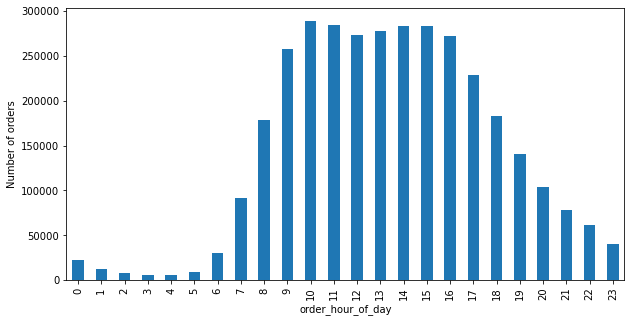

In [12]:
# plan - take orders table and group by order time of day
time_of_day = orders.groupby(by='order_hour_of_day').count().sort_values(by='order_hour_of_day', ascending=True)
plt.figure(figsize=(10,5))
time_of_day['order_id'].plot.bar()
plt.ylabel('Number of orders');

### Q4. What departments are the most popular? What can we say about food habits based on this?

In [16]:
# plan: Which departments are most popular?
# which departments have the most products ordered from them.
# from order product table, group by department. Merge with department table.

department = pd.read_csv('./instacart-market-basket-analysis/departments.csv')

In [18]:
df_with_product_description_dept = df_with_product_description.merge(department, on='department_id') # contains all the info for this question

In [22]:
df_with_product_description_dept

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs
...,...,...,...,...,...,...,...,...
32434484,2882701,21581,8,0,Doc McStuffins Adhesive Bandages,6,2,other
32434485,2909991,18001,5,0,Dried Porcini Mushroom,6,2,other
32434486,3016581,46404,1,1,Cotes De Provence Rose,6,2,other
32434487,3326955,46404,1,0,Cotes De Provence Rose,6,2,other


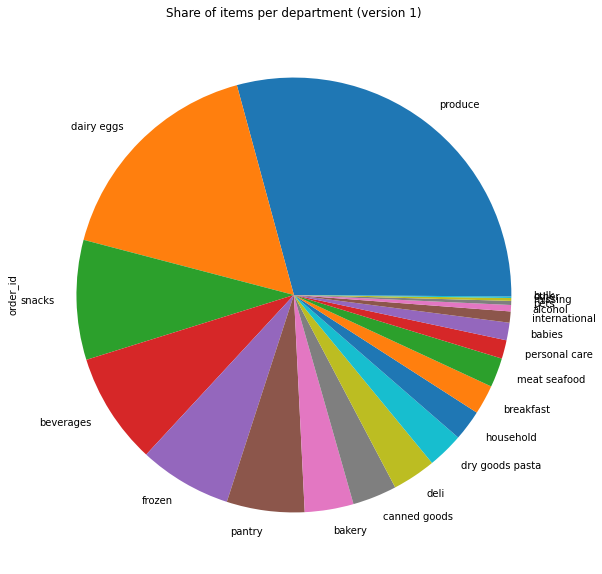

In [37]:
how_many_items_per_department = df_with_product_description_dept.groupby(by='department').count()['order_id'].sort_values(ascending = False)
how_many_items_per_department.plot.pie(y='order_id', figsize = [10,10], title = 'Share of items per department (version 1)');

### Q8. What is usually the first item that shoppers put into their carts?

### filter the dataset such that you only have those orders which satisfy add_to_cart_order == 1

In [43]:
first_in_cart = df_with_product_description['add_to_cart_order'] == 1

In [44]:
first_in_cart_products = df_with_product_description[first_in_cart]

In [50]:
first_in_cart_products.groupby(by='product_name').count()['order_id'].sort_values(ascending = False)[:15]

product_name
Banana                        110916
Bag of Organic Bananas         78988
Organic Whole Milk             30927
Organic Strawberries           27975
Organic Hass Avocado           24116
Organic Baby Spinach           23543
Organic Avocado                22398
Spring Water                   16822
Strawberries                   16366
Organic Raspberries            14393
Sparkling Water Grapefruit     13733
Organic Half & Half            12676
Large Lemon                    12316
Soda                           11770
Organic Reduced Fat Milk        9885
Name: order_id, dtype: int64

The first thing people put in their carts is generally produce.
Why do people order produce so often? Because it is perishable. You buy it in small quantities, because if you buy too much at one time, it goes bad. Another reason is that it is genuinely popular. Fruits make great snacks!